In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import io


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn_matrix import accuracy_score,f1_score, precision_score, recall_score
import plotly.offline as py
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
import math
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
# Read the CSV file into a DataFrame
diabetes = pd.read_csv("diabetes.csv")

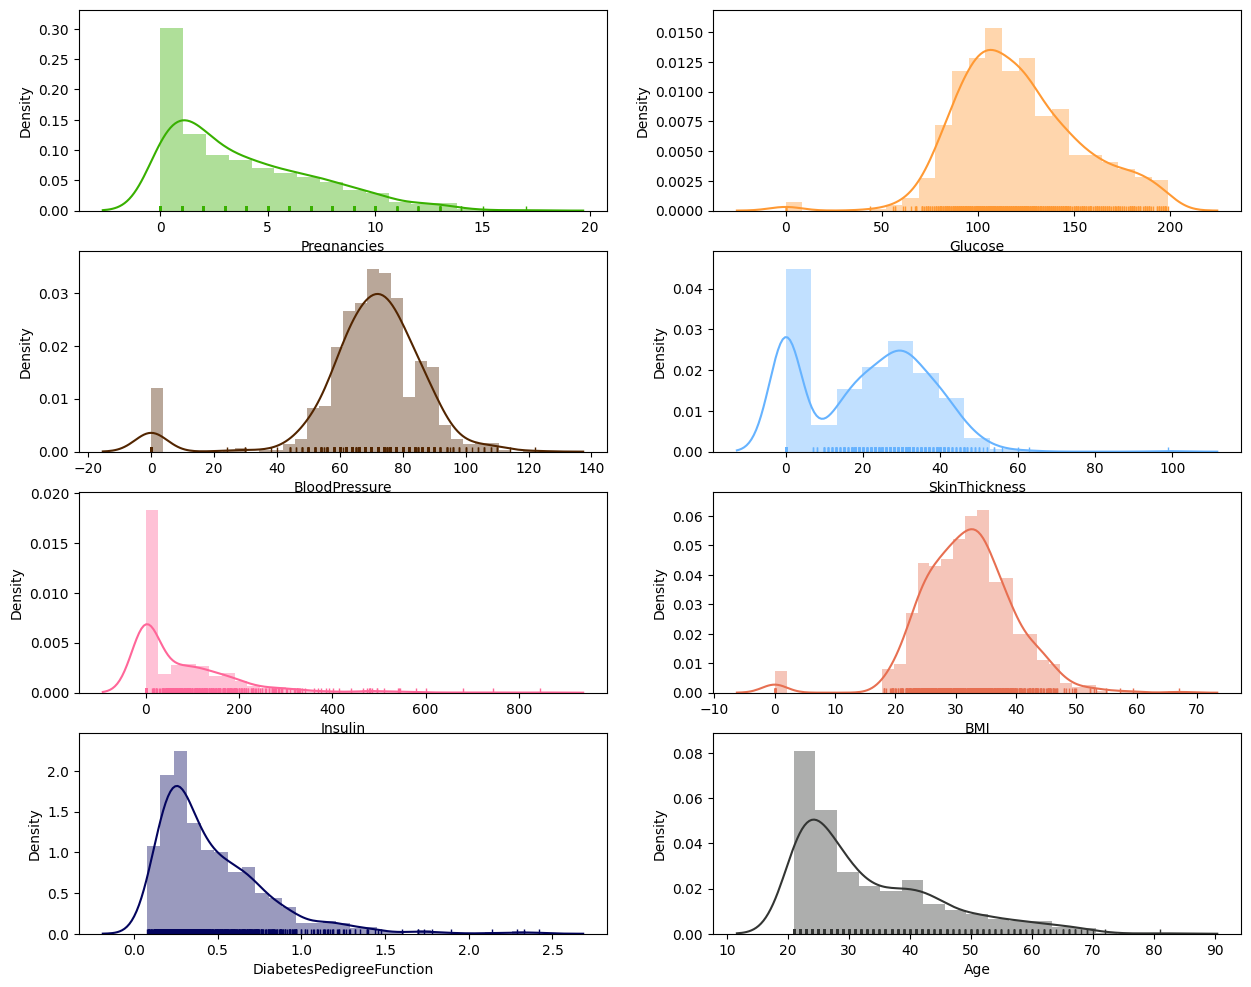

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(diabetes['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(diabetes['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(diabetes['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(diabetes['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(diabetes['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(diabetes['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(diabetes['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(diabetes['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()


In [ ]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes['Outcome'].value_counts()




Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
 diabetes[diabetes['Glucose'] == 0].count()

Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     5
dtype: int64

In [ ]:
# Calculate the mean excluding 0 values
mean_glucose = diabetes[diabetes['Glucose'] != 0]['Glucose'].mean()

# Replace 0 values with the mean
diabetes['Glucose'] = diabetes['Glucose'].replace(0, mean_glucose)

In [ ]:
diabetes[diabetes['Glucose'] == 0].count()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes[diabetes['BloodPressure'] == 0].count()

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

In [ ]:
# Calculate the mean excluding 0 values
mean_bp = diabetes[diabetes['BloodPressure'] != 0]['BloodPressure'].mean()

# Replace 0 values with the mean
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0, mean_bp)

In [ ]:
diabetes[diabetes['Insulin'] == 0].count()

Pregnancies                 374
Glucose                     374
BloodPressure               374
SkinThickness               374
Insulin                     374
BMI                         374
DiabetesPedigreeFunction    374
Age                         374
Outcome                     374
dtype: int64

In [ ]:
diabetes = diabetes.drop('Insulin', axis = 1)

In [ ]:
diabetes = diabetes.drop('SkinThickness', axis = 1)

In [ ]:
diabetes[(diabetes['BMI'] == 0)].count()

Pregnancies                 11
Glucose                     11
BloodPressure               11
BMI                         11
DiabetesPedigreeFunction    11
Age                         11
Outcome                     11
dtype: int64

In [ ]:
# Calculate the mean excluding 0 values
mean_insulin = diabetes[diabetes['BMI'] != 0]['BMI'].mean()

# Replace 0 values with the mean
diabetes['BMI'] = diabetes['BMI'].replace(0, mean_insulin)

In [ ]:
diabetes[(diabetes['BMI'] == 0) | (diabetes['Glucose'] == 0)|(diabetes['BloodPressure'] == 0)].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Calculate z-scores
z_scores = (diabetes - np.mean(diabetes)) / np.std(diabetes)

# Define threshold (e.g., z-score > 3 or z-score < -3)
threshold = 3

# Remove outliers
outliers_removed = diabetes[abs(z_scores) <= threshold]

print("Original data size:", len(diabetes))
print("Outliers removed:", len(diabetes) - len(outliers_removed))
print("Outliers removed data size:", len(outliers_removed))

Original data size: 768
Outliers removed: 0
Outliers removed data size: 768


**bold text**Generatin a new data set


In [ ]:
diabetes_outcome_1 = diabetes[diabetes['Outcome'] == 1]

In [ ]:
diabetes_outcome_1

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
2,8,183.0,64.0,23.3,0.672,32,1
4,0,137.0,40.0,43.1,2.288,33,1
6,3,78.0,50.0,31.0,0.248,26,1
8,2,197.0,70.0,30.5,0.158,53,1
...,...,...,...,...,...,...,...
755,1,128.0,88.0,36.5,1.057,37,1
757,0,123.0,72.0,36.3,0.258,52,1
759,6,190.0,92.0,35.5,0.278,66,1
761,9,170.0,74.0,44.0,0.403,43,1


In [ ]:
print(diabetes_outcome_1)

     Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  \
0              6    148.0           72.0  33.6                     0.627   50   
2              8    183.0           64.0  23.3                     0.672   32   
4              0    137.0           40.0  43.1                     2.288   33   
6              3     78.0           50.0  31.0                     0.248   26   
8              2    197.0           70.0  30.5                     0.158   53   
..           ...      ...            ...   ...                       ...  ...   
755            1    128.0           88.0  36.5                     1.057   37   
757            0    123.0           72.0  36.3                     0.258   52   
759            6    190.0           92.0  35.5                     0.278   66   
761            9    170.0           74.0  44.0                     0.403   43   
766            1    126.0           60.0  30.1                     0.349   47   

     Outcome  
0          1

In [ ]:
diabetes_outcome_1.shape

(268, 7)

In [ ]:
diabetes_outcome_0 = diabetes[diabetes['Outcome'] == 0]

In [ ]:
diabetes_outcome_1.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.165573,75.147324,35.384757,0.550500,37.067164,1.0
std,3.741239,29.541750,11.945712,6.595065,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,67.100000,2.420000,70.000000,1.0


In [ ]:
diabetes_outcome_0.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,110.710121,70.935397,30.888434,0.429734,31.190000,0.0
std,3.017185,24.717060,11.931033,6.504779,0.299085,11.667655,0.0
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.000000,63.500000,25.750000,0.229750,23.000000,0.0
50%,2.000000,107.500000,72.000000,30.400000,0.336000,27.000000,0.0
75%,5.000000,125.000000,78.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.000000,122.000000,57.300000,2.329000,81.000000,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = diabetes.drop('Outcome', axis=1)  # Features
y = diabetes['Outcome']  # Target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)






LinearRegression()

In [ ]:
diabetes

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


In [ ]:
weights = model.coef_
coefficients = {}

# Display the weights for each attribute
for feature, weight in zip(X.columns, weights):
    coefficients[feature] = weight
    print(f'{feature}: {weight}')


Pregnancies: 0.01152697026880751
Glucose: 0.006122180384984532
BloodPressure: -0.0017146649880325645
BMI: 0.01579267392358358
DiabetesPedigreeFunction: 0.08774748308396857
Age: 0.005802941296907573


In [ ]:
variable_ranges = {}
for feature in X.columns:
    variable_ranges[feature] =  (diabetes_outcome_0[feature].mean(), diabetes_outcome_1[feature].mean())
print(variable_ranges)



{'Pregnancies': (3.298, 4.865671641791045), 'Glucose': (110.71012057667103, 142.16557285655603), 'BloodPressure': (70.93539699863575, 75.14732442833582), 'BMI': (30.88843434610304, 35.38475719158501), 'DiabetesPedigreeFunction': (0.42973400000000006, 0.5505), 'Age': (31.19, 37.06716417910448)}


In [ ]:
means1 = diabetes_outcome_1.mean()
means1

Pregnancies                   4.865672
Glucose                     142.165573
BloodPressure                75.147324
BMI                          35.384757
DiabetesPedigreeFunction      0.550500
Age                          37.067164
Outcome                       1.000000
dtype: float64

In [ ]:



OutcomeFor1 = 0
# Print the element-wise product of means and coefficients
for mean, coef in zip(means1, weights):
    OutcomeFor1 += (mean * coef)
print(OutcomeFor1)

1.6198207471773947


In [ ]:
means0 = diabetes_outcome_0.mean()
means0


Pregnancies                   3.298000
Glucose                     110.710121
BloodPressure                70.935397
BMI                          30.888434
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64

In [ ]:

OutcomeFor0 = 0
# Print the element-wise product of means and coefficients
for mean, coef in zip(means0, weights):
   OutcomeFor0 =OutcomeFor0 +(mean * coef)
print(OutcomeFor0)

1.3006856224987222


In [ ]:
target_range = (OutcomeFor0,OutcomeFor1)
print(target_range)

(1.3006856224987222, 1.6198207471773947)


In [ ]:
newdiabetes = diabetes.drop('Outcome', axis=1)  # Features



In [ ]:
newdiabetes

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,33.6,0.627,50
1,1,85.0,66.0,26.6,0.351,31
2,8,183.0,64.0,23.3,0.672,32
3,1,89.0,66.0,28.1,0.167,21
4,0,137.0,40.0,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63
764,2,122.0,70.0,36.8,0.340,27
765,5,121.0,72.0,26.2,0.245,30
766,1,126.0,60.0,30.1,0.349,47


In [ ]:
coefficient = []
for i in coefficients.values():
    coefficient.append(i)
print(coefficient)



[0.01152697026880751, 0.006122180384984532, -0.0017146649880325645, 0.01579267392358358, 0.08774748308396857, 0.005802941296907573]


In [ ]:
row_sums = newdiabetes.apply(lambda row: sum(row*coefficient),axis=1).tolist()

In [ ]:
diabetes['coff_mean'] = row_sums
diabetes


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,coff_mean
0,6,148.0,72.0,33.6,0.627,50,1,1.727587
1,1,85.0,66.0,26.6,0.351,31,0,1.049520
2,8,183.0,64.0,23.3,0.672,32,1,1.715466
3,1,89.0,66.0,28.1,0.167,21,0,1.023523
4,0,137.0,40.0,43.1,2.288,33,1,1.843080
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0,1.503464
764,2,122.0,70.0,36.8,0.340,27,0,1.417617
765,5,121.0,72.0,26.2,0.245,30,0,1.284317
766,1,126.0,60.0,30.1,0.349,47,1,1.458763


In [ ]:
diabetes.loc[(diabetes['coff_mean'] > OutcomeFor0) & (diabetes['coff_mean'] < OutcomeFor1), 'Outcome'] = 2

In [ ]:
diabetes


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,coff_mean
0,6,148.0,72.0,33.6,0.627,50,1,1.727587
1,1,85.0,66.0,26.6,0.351,31,0,1.049520
2,8,183.0,64.0,23.3,0.672,32,1,1.715466
3,1,89.0,66.0,28.1,0.167,21,0,1.023523
4,0,137.0,40.0,43.1,2.288,33,1,1.843080
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,2,1.503464
764,2,122.0,70.0,36.8,0.340,27,2,1.417617
765,5,121.0,72.0,26.2,0.245,30,0,1.284317
766,1,126.0,60.0,30.1,0.349,47,2,1.458763


In [ ]:
diabetes['Outcome'].value_counts()

Outcome
0    314
2    295
1    159
Name: count, dtype: int64

In [ ]:
df2 = diabetes[diabetes['Outcome']==2]

In [ ]:
df2

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,coff_mean
7,10,115.0,72.405184,35.300000,0.134,29,2,1.432695
9,8,125.0,96.000000,32.457464,0.232,54,2,1.539187
10,4,110.0,92.000000,37.600000,0.191,30,2,1.346451
16,0,118.0,84.000000,45.800000,0.551,31,2,1.529930
18,1,103.0,30.000000,43.300000,0.183,33,2,1.482049
...,...,...,...,...,...,...,...,...
756,7,137.0,90.000000,32.000000,0.391,39,2,1.531097
757,0,123.0,72.000000,36.300000,0.258,52,2,1.527238
763,10,101.0,76.000000,32.900000,0.171,63,2,1.503464
764,2,122.0,70.000000,36.800000,0.340,27,2,1.417617


In [ ]:
len(diabetes)

768

In [ ]:
diabetes.duplicated().sum()

0

In [ ]:
zero_bmi_rows = diabetes[diabetes['BMI'] == 0.0]
print(zero_bmi_rows)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, BMI, DiabetesPedigreeFunction, Age, Outcome, coff_mean]
Index: []


In [ ]:
diabetes.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  \
0              6    148.0           72.0  33.6                     0.627   50   
1              1     85.0           66.0  26.6                     0.351   31   
2              8    183.0           64.0  23.3                     0.672   32   
3              1     89.0           66.0  28.1                     0.167   21   
4              0    137.0           40.0  43.1                     2.288   33   
..           ...      ...            ...   ...                       ...  ...   
763           10    101.0           76.0  32.9                     0.171   63   
764            2    122.0           70.0  36.8                     0.340   27   
765            5    121.0           72.0  26.2                     0.245   30   
766            1    126.0           60.0  30.1                     0.349   47   
767            1     93.0           70.0  30.4                     0.315   23   

     Outcome  coff_mean  
0          1   1.727587  
1          0   1.049520  
2          1   1.715466  
3          0   1.023523  
4          1   1.843080  
..       ...        ...  
763        2   1.503464  
764        2   1.417617  
765        0   1.284317  
766        2   1.458763  
767        0   1.102069  

[768 rows x 8 columns]>

In [ ]:
diabetes.min()

Pregnancies                  0.000000
Glucose                     44.000000
BloodPressure               24.000000
BMI                         18.200000
DiabetesPedigreeFunction     0.078000
Age                         21.000000
Outcome                      0.000000
coff_mean                    0.806504
dtype: float64

In [ ]:
diabetes.max()

Pregnancies                  17.000000
Glucose                     199.000000
BloodPressure               122.000000
BMI                          67.100000
DiabetesPedigreeFunction      2.420000
Age                          81.000000
Outcome                       2.000000
coff_mean                     2.263756
dtype: float64

In [ ]:
print("\nSummary Statistics:")
print(diabetes.describe())


Summary Statistics:
       Pregnancies     Glucose  BloodPressure         BMI  \
count   768.000000  768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184   32.457464   
std       3.369578   30.435949      12.096346    6.875151   
min       0.000000   44.000000      24.000000   18.200000   
25%       1.000000   99.750000      64.000000   27.500000   
50%       3.000000  117.000000      72.202592   32.400000   
75%       6.000000  140.250000      80.000000   36.600000   
max      17.000000  199.000000     122.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome   coff_mean  
count                768.000000  768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.975260    1.412050  
std                    0.331329   11.760232    0.890724    0.271433  
min                    0.078000   21.000000    0.000000    0.806504  
25%                    0.243750   24.000000    0.000000    1.203280  
50%      

In [ ]:
print("\nOutcome Counts:")
print(diabetes['Outcome'].value_counts())


Outcome Counts:
Outcome
0    314
2    295
1    159
Name: count, dtype: int64


In [ ]:
print("\nCorrelation Matrix:")
print(diabetes.corr())


Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure       BMI  \
Pregnancies                  1.000000  0.127911       0.208522  0.021565   
Glucose                      0.127911  1.000000       0.218367  0.230941   
BloodPressure                0.208522  0.218367       1.000000  0.281268   
BMI                          0.021565  0.230941       0.281268  1.000000   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763  0.153400   
Age                          0.544341  0.266534       0.324595  0.025519   
Outcome                      0.165529  0.254539       0.116662  0.278203   
coff_mean                    0.356866  0.862173       0.297155  0.562991   

                          DiabetesPedigreeFunction       Age   Outcome  \
Pregnancies                              -0.033523  0.544341  0.165529   
Glucose                                   0.137060  0.266534  0.254539   
BloodPressure                            -0.002763  0.324595  0.116662  

In [ ]:
print("\nMean values by Outcome:")
print(diabetes.groupby('Outcome').mean())


Mean values by Outcome:
         Pregnancies     Glucose  BloodPressure        BMI  \
Outcome                                                      
0           2.866242  104.908833      69.819323  29.361154   
1           5.314465  154.666667      76.554978  36.468553   
2           4.094915  121.769696      72.920924  33.591288   

         DiabetesPedigreeFunction        Age  coff_mean  
Outcome                                                  
0                        0.416561  29.098726   1.224695  
1                        0.578220  38.534591   1.727178  
2                        0.473437  34.796610   1.441625  


In [ ]:
import matplotlib.pyplot as plt

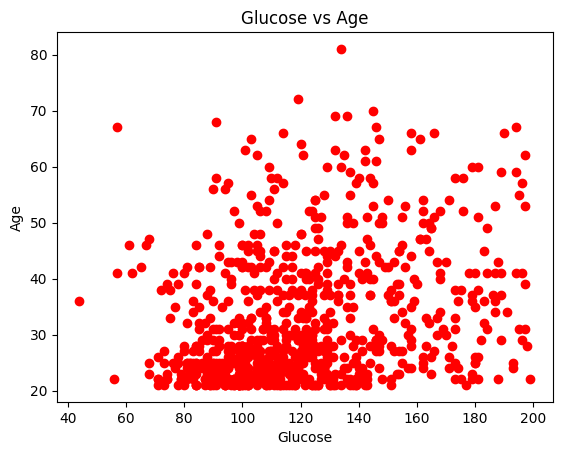

In [ ]:
plt.scatter(x=diabetes['Glucose'],y=diabetes['Age'],color='red')
plt.xlabel("Glucose")
plt.ylabel("Age")
plt.title("Glucose vs Age")
plt.show()

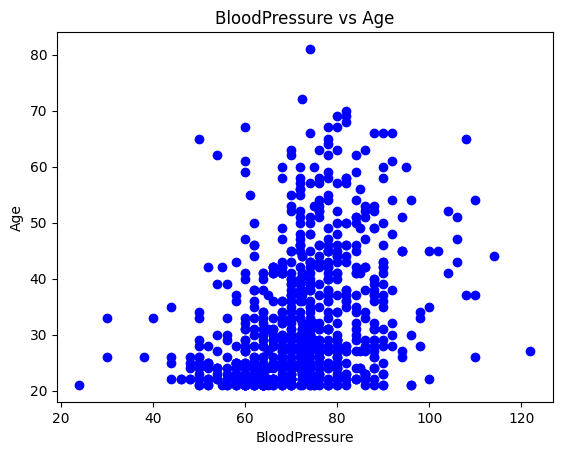

In [ ]:
plt.scatter(x=diabetes['BloodPressure'],y=diabetes['Age'],color='blue')
plt.xlabel("BloodPressure")
plt.ylabel("Age")
plt.title("BloodPressure vs Age")
plt.show()

In [ ]:
# plt.scatter(x=diabetes['Insulin'],y=diabetes['Age'],color='black')
# plt.xlabel("Insulin")
# plt.ylabel("Age")
# plt.title("Insulin vs Age")
# plt.show()

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

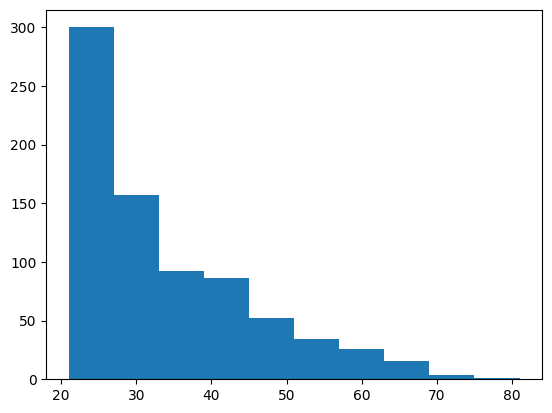

In [ ]:
plt.hist(diabetes['Age'], bins = 10)

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

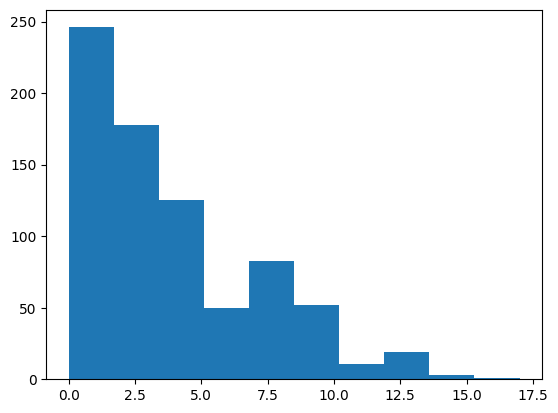

In [ ]:
plt.hist(diabetes['Pregnancies'], bins = 10)

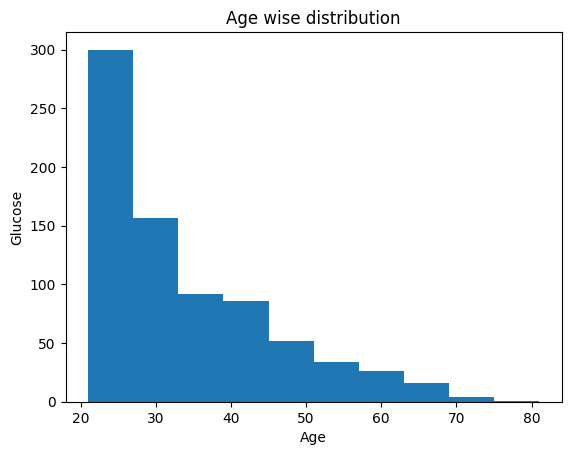

In [ ]:
plt.hist(x=diabetes['Age'],bins=10)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.title("Age wise distribution")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ddde56dfeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ddde570c430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ddde56dfc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ddde570c970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ddde570cc10>],
 'means': []}

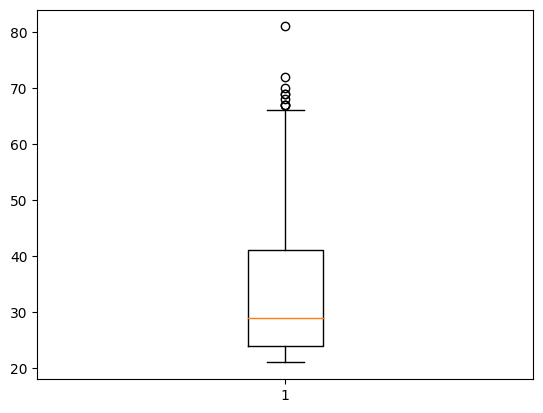

In [ ]:
plt.boxplot(diabetes['Age'])

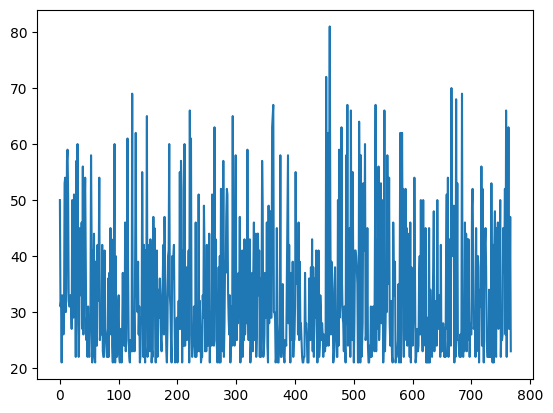

In [ ]:
plt.plot(diabetes['Age'])

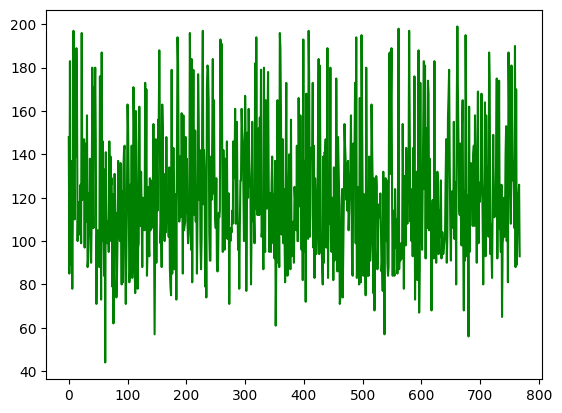

In [ ]:
plt.plot(diabetes['Glucose'],color='green')

In [ ]:
diabetes

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,coff_mean
0,6,148.0,72.0,33.6,0.627,50,1,1.727587
1,1,85.0,66.0,26.6,0.351,31,0,1.049520
2,8,183.0,64.0,23.3,0.672,32,1,1.715466
3,1,89.0,66.0,28.1,0.167,21,0,1.023523
4,0,137.0,40.0,43.1,2.288,33,1,1.843080
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,2,1.503464
764,2,122.0,70.0,36.8,0.340,27,2,1.417617
765,5,121.0,72.0,26.2,0.245,30,0,1.284317
766,1,126.0,60.0,30.1,0.349,47,2,1.458763


In [ ]:
diabetes = diabetes.drop("coff_mean",axis=1)

In [ ]:
X= diabetes.drop("Outcome",axis=1)
y = diabetes["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
log_model.fit(X_train,y_train)
y_test_prediction=log_model.predict(X_test)
y_train_prediction=log_model.predict(X_train)



In [ ]:
print(accuracy_score(y_test,y_test_prediction))
print(accuracy_score(y_train,y_train_prediction))


0.9225108225108225
0.9305400372439478


In [ ]:
# Evaluate the model
acc1 = accuracy_score(y_test, y_test_prediction)
f11 = f1_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
precision1 = precision_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
recall1 = recall_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass

# Print the evaluation metrics
print(f"The accuracy score for Logistic Regression is: {round(acc1, 3) * 100}%")
print(f"The F1 score for Logistic Regression is: {round(f11, 3) * 100}%")
print(f"The precision score for Logistic Regression is: {round(precision1, 3) * 100}%")
print(f"The recall score for Logistic Regression is: {round(recall1, 3) * 100}%")


The accuracy score for Logistic Regression is: 92.30000000000001%
The F1 score for Logistic Regression is: 92.2%
The precision score for Logistic Regression is: 92.2%
The recall score for Logistic Regression is: 92.30000000000001%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn.fit(X_train,y_train)
y_test_prediction=knn.predict(X_test)
y_train_prediction=knn.predict(X_train)

In [ ]:

print(accuracy_score(y_test,y_test_prediction))
print(accuracy_score(y_train,y_train_prediction))


0.9138528138528138
1.0


In [ ]:
# Evaluate the model
acc2 = accuracy_score(y_test, y_test_prediction)
f12 = f1_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
precision2 = precision_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
recall2 = recall_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass

# Print the evaluation metrics
print(f"The accuracy score for knn is: {round(acc2, 3) * 100}%")
print(f"The F1 score for knn is: {round(f12, 3) * 100}%")
print(f"The precision score for knn is: {round(precision2, 3) * 100}%")
print(f"The recall score for knn is: {round(recall2, 3) * 100}%")


The accuracy score for knn is: 91.4%
The F1 score for knn is: 91.3%
The precision score for knn is: 91.2%
The recall score for knn is: 91.4%


In [ ]:
import  numpy as np
input_data = (2,      197  ,           70 ,            45,   0.158,   53  )

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a diabetes')
elif (prediction[0]==1):
  print('the Person has diabetes')
elif (prediction[0]==2):
    print("person is more likely to suffer from diabetes in near future")

[1]
the Person has diabetes


In [ ]:
import  numpy as np
input_data = ( 9 ,      89  ,           62  ,            0 ,       0.142,   33 )

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a diabetes')
elif (prediction[0]==1):
  print('the Person has diabetes')
elif (prediction[0]==2):
    print("person is more likely to suffer from diabetes in near future")

[0]
The Person does not have a diabetes


In [ ]:
import  numpy as np
input_data = ( 3.510388, 137.724704, 70.639115, 20.631916, 0.521956, 34.123166   )
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a diabetes')
elif (prediction[0]==1):
  print('the Person has diabetes')
elif (prediction[0]==2):
    print("person is more likely to suffer from diabetes in near future")

[2]
person is more likely to suffer from diabetes in near future


In [ ]:
from sklearn import svm
svc_model = svm.SVC(random_state=42)
svc_model.fit(X_train,y_train)
y_test_prediction=svc_model.predict(X_test)
y_train_prediction=svc_model.predict(X_train)

In [ ]:

print(accuracy_score(y_test,y_test_prediction))
print(accuracy_score(y_train,y_train_prediction))


0.8878787878787878
0.8988826815642458


In [ ]:
# Evaluate the model

acc3 = accuracy_score(y_test, y_test_prediction)
f13 = f1_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
precision3 = precision_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
recall3 = recall_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass

# Print the evaluation metrics
print(f"The accuracy score for svm is: {round(acc3, 3) * 100}%")
print(f"The F1 score for svm is: {round(f13, 3) * 100}%")
print(f"The precision score for svm is: {round(precision3, 3) * 100}%")
print(f"The recall score for svm is: {round(recall3, 3) * 100}%")


The accuracy score for svm is: 88.8%
The F1 score for svm is: 88.4%
The precision score for svm is: 89.60000000000001%
The recall score for svm is: 88.8%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_test_prediction = decision_tree_classifier.predict(X_test)
y_train_prediction= decision_tree_classifier.predict(X_train)

In [ ]:

print(accuracy_score(y_test,y_test_prediction))
print(accuracy_score(y_train,y_train_prediction))

0.8575757575757575
1.0


In [ ]:

acc4 = accuracy_score(y_test, y_test_prediction)
f14 = f1_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
precision4 = precision_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
recall4 = recall_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass

# Print the evaluation metrics
print(f"The accuracy score for decision_tree_classifier is: {round(acc4, 3) * 100}%")
print(f"The F1 score for decision_tree_classifier is: {round(f14, 3) * 100}%")
print(f"The precision score for decision_tree_classifier is: {round(precision4, 3) * 100}%")
print(f"The recall score for decision_tree_classifier is: {round(recall4, 3) * 100}%")


The accuracy score for decision_tree_classifier is: 85.8%
The F1 score for decision_tree_classifier is: 85.9%
The precision score for decision_tree_classifier is: 86.0%
The recall score for decision_tree_classifier is: 85.8%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=60, random_state=42)

# Train the model
random_forest_classifier.fit(X_train, y_train)
y_test_prediction = random_forest_classifier.predict(X_test)
y_train_prediction= random_forest_classifier.predict(X_train)



In [ ]:

print(accuracy_score(y_test,y_test_prediction))
print(accuracy_score(y_train,y_train_prediction))

0.9225108225108225
1.0


In [ ]:
# # Compute the confusion matrix
# cm = confusion_matrix(y_test, y_test_prediction)
# cm

NameError: name 'confusion_matrix' is not defined

In [ ]:
import  numpy as np
input_data = ( 9 ,      89  ,           62  ,            0 ,       0.142,   33 )

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = random_forest_classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a diabetes')
elif (prediction[0]==1):
  print('the Person has diabetes')
elif (prediction[0]==2):
    print("person is more likely to suffer from diabetes in near future")

[0]
The Person does not have a diabetes


In [ ]:
# Evaluate the model

acc5 = accuracy_score(y_test, y_test_prediction)
f15 = f1_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
precision5 = precision_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
recall5 = recall_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass

# Print the evaluation metrics
print(f"The accuracy score for random_forest_classifier is: {round(acc5, 3) * 100}%")
print(f"The F1 score for random_forest_classifier is: {round(f15, 3) * 100}%")
print(f"The precision score for random_forest_classifier is: {round(precision5, 3) * 100}%")
print(f"The recall score for random_forest_classifier is: {round(recall5, 3) * 100}%")


The accuracy score for random_forest_classifier is: 90.10000000000001%
The F1 score for random_forest_classifier is: 89.9%
The precision score for random_forest_classifier is: 90.3%
The recall score for random_forest_classifier is: 90.10000000000001%


In [ ]:

# Access feature importance scores
feature_importance = random_forest_classifier.feature_importances_

# Print feature importance scores
for i, importance in enumerate(feature_importance):
    print(f"Feature {i}: Importance = {importance}")



Feature 0: Importance = 0.0836242249009738
Feature 1: Importance = 0.39149902672660003
Feature 2: Importance = 0.07355520757971216
Feature 3: Importance = 0.20384084685039167
Feature 4: Importance = 0.11238958484398769
Feature 5: Importance = 0.13509110909833483


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_test_prediction = clf.predict(X_test)
y_train_prediction= clf.predict(X_train)


In [ ]:
print(accuracy_score(y_test,y_test_prediction))
print(accuracy_score(y_train,y_train_prediction))

0.8922077922077922
0.8951582867783985


In [ ]:
# Evaluate the model

acc6 = accuracy_score(y_test, y_test_prediction)
f16 = f1_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
precision6 = precision_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
recall6 = recall_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass

# Print the evaluation metrics
print(f"The accuracy score for GaussianNB is: {round(acc6, 3) * 100}%")
print(f"The F1 score for GaussianNB is: {round(f16, 3) * 100}%")
print(f"The precision score for GaussianNB is: {round(precision6, 3) * 100}%")
print(f"The recall score for GaussianNB is: {round(recall6, 3) * 100}%")


The accuracy score for GaussianNB is: 89.2%
The F1 score for GaussianNB is: 89.3%
The precision score for GaussianNB is: 89.60000000000001%
The recall score for GaussianNB is: 89.2%


In [ ]:
from sklearn.ensemble import AdaBoostClassifier


# Initialize AdaBoost classifier with DecisionTreeClassifier as the base estimator
# You can replace DecisionTreeClassifier with any other classifier
base_estimator = DecisionTreeClassifier(max_depth=1)
n_estimators = 50  # Number of weak learners (base estimators)
learning_rate = 1.0  # Learning rate
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)
y_test_prediction = adaboost.predict(X_test)
y_train_prediction= adaboost.predict(X_train)



In [ ]:

print(accuracy_score(y_test,y_test_prediction))
print(accuracy_score(y_train,y_train_prediction))

0.80995670995671
0.8858472998137802


In [ ]:
import xgboost as xgb


# Initialize XGBoost classifier
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}
Xgboost = xgb.XGBClassifier(**params)

# Train the XGBoost classifier
Xgboost.fit(X_train, y_train)

y_test_prediction = Xgboost.predict(X_test)
y_train_prediction= Xgboost.predict(X_train)


In [ ]:
print(accuracy_score(y_test,y_test_prediction))
print(accuracy_score(y_train,y_train_prediction))

0.9138528138528138
1.0


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.mlab as mlab
%matplotlib inline


import scipy.optimize as opt
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
data = {'Model':['Logistic Regression','KNN','SVM','Decision Tree','Random Forest','GaussianNB'],
        'F1_Score':  [f12,f13,f15],'Accuracies':[acc2,acc3,acc5],'Recall':[recall2,recall3,recall5],
        'Precision':[precision2,precision3,precision5]}

# Create DataFrame
df = pd.DataFrame(data)

# Print the output.
print(df)

           Model  F1_Score  Accuracies    Recall  Precision
0            KNN  0.912650    0.913853  0.913853   0.912272
1            SVM  0.883875    0.887879  0.887879   0.896024
2  Random Forest  0.899446    0.900866  0.900866   0.902910


In [ ]:
Accuracies = [acc1,acc2,acc3,acc4,acc5,acc6]
F1_scores = [f11,f12,f13,f14,f15,f16]
Precisions = [precision1,precision2,precision3,precision4,precision5,precision6]
Recalls = [recall1,recall2,recall3,recall4,recall5,recall6]

In [ ]:
from tabulate import tabulate
import pandas as pd

# Data for the DataFrame
data = {
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'GaussianNB'],
    'F1_Score':  [0.921936, 0.919346, 0.883875, 0.869786, 0.920539, 0.892947],
    'Accuracies': [0.922511, 0.918182, 0.887879, 0.870563, 0.922511, 0.892208],
    'Recall': [0.922511, 0.918182, 0.887879, 0.870563, 0.922511, 0.892208],
    'Precision': [0.921663, 0.921143, 0.896024, 0.869633, 0.922284, 0.896190]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a table using tabulate
table = tabulate(df, headers='keys', tablefmt='grid')

# Print the table
print(table)


+----+---------------------+------------+--------------+----------+-------------+
|    | Model               |   F1_Score |   Accuracies |   Recall |   Precision |
+====+=====================+============+==============+==========+=============+
|  0 | Logistic Regression |   0.921936 |     0.922511 | 0.922511 |    0.921663 |
+----+---------------------+------------+--------------+----------+-------------+
|  1 | KNN                 |   0.919346 |     0.918182 | 0.918182 |    0.921143 |
+----+---------------------+------------+--------------+----------+-------------+
|  2 | SVM                 |   0.883875 |     0.887879 | 0.887879 |    0.896024 |
+----+---------------------+------------+--------------+----------+-------------+
|  3 | Decision Tree       |   0.869786 |     0.870563 | 0.870563 |    0.869633 |
+----+---------------------+------------+--------------+----------+-------------+
|  4 | Random Forest       |   0.920539 |     0.922511 | 0.922511 |    0.922284 |
+----+----------

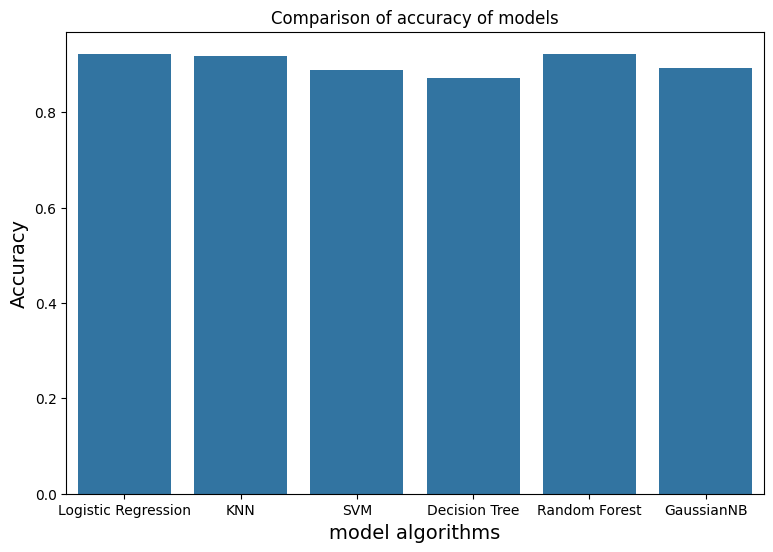

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(x='Model', y='Accuracies', data = df)
plt.title('Comparison of accuracy of models')
plt.xlabel('model algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

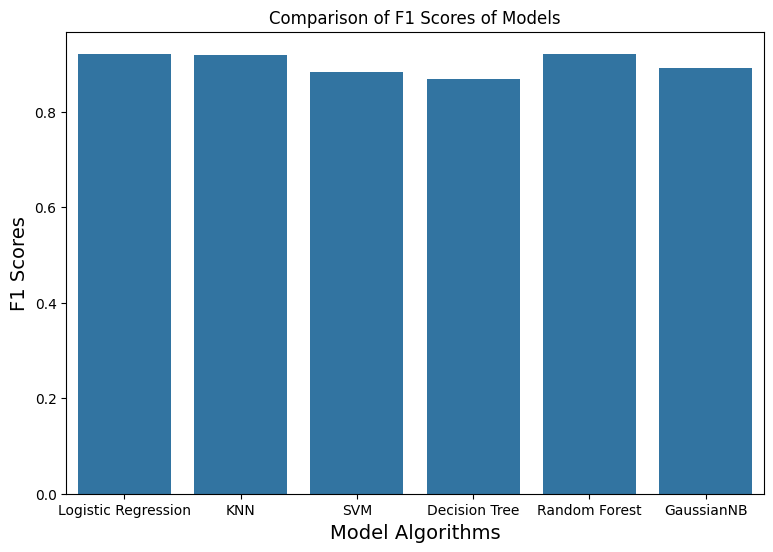

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(x='Model', y='F1_Score', data=df)
plt.title('Comparison of F1 Scores of Models')
plt.xlabel('Model Algorithms', fontsize=14)
plt.ylabel('F1 Scores', fontsize=14)
plt.show()

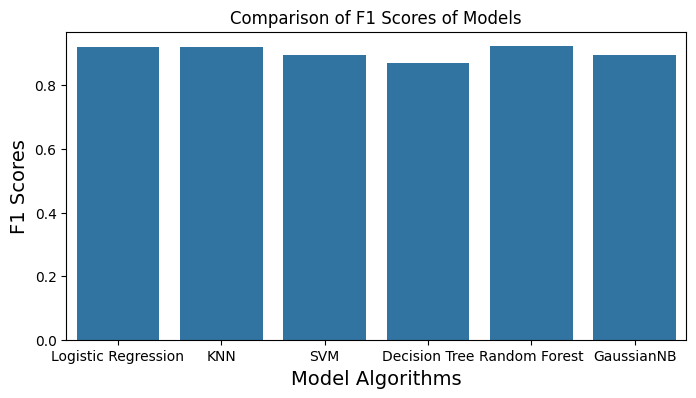

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='Precision', data=df)
plt.title('Comparison of F1 Scores of Models')
plt.xlabel('Model Algorithms', fontsize=14)
plt.ylabel('F1 Scores', fontsize=14)
plt.show()

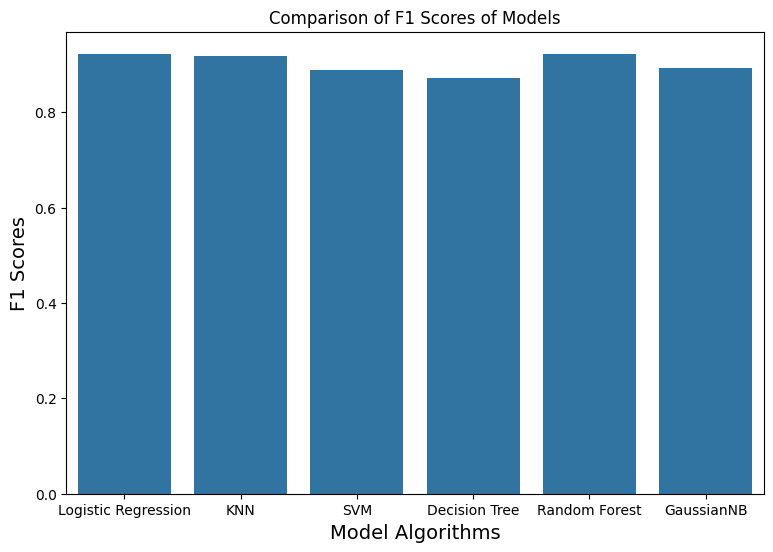

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(x='Model', y='Recall', data=df)
plt.title('Comparison of F1 Scores of Models')
plt.xlabel('Model Algorithms', fontsize=14)
plt.ylabel('F1 Scores', fontsize=14)
plt.show()

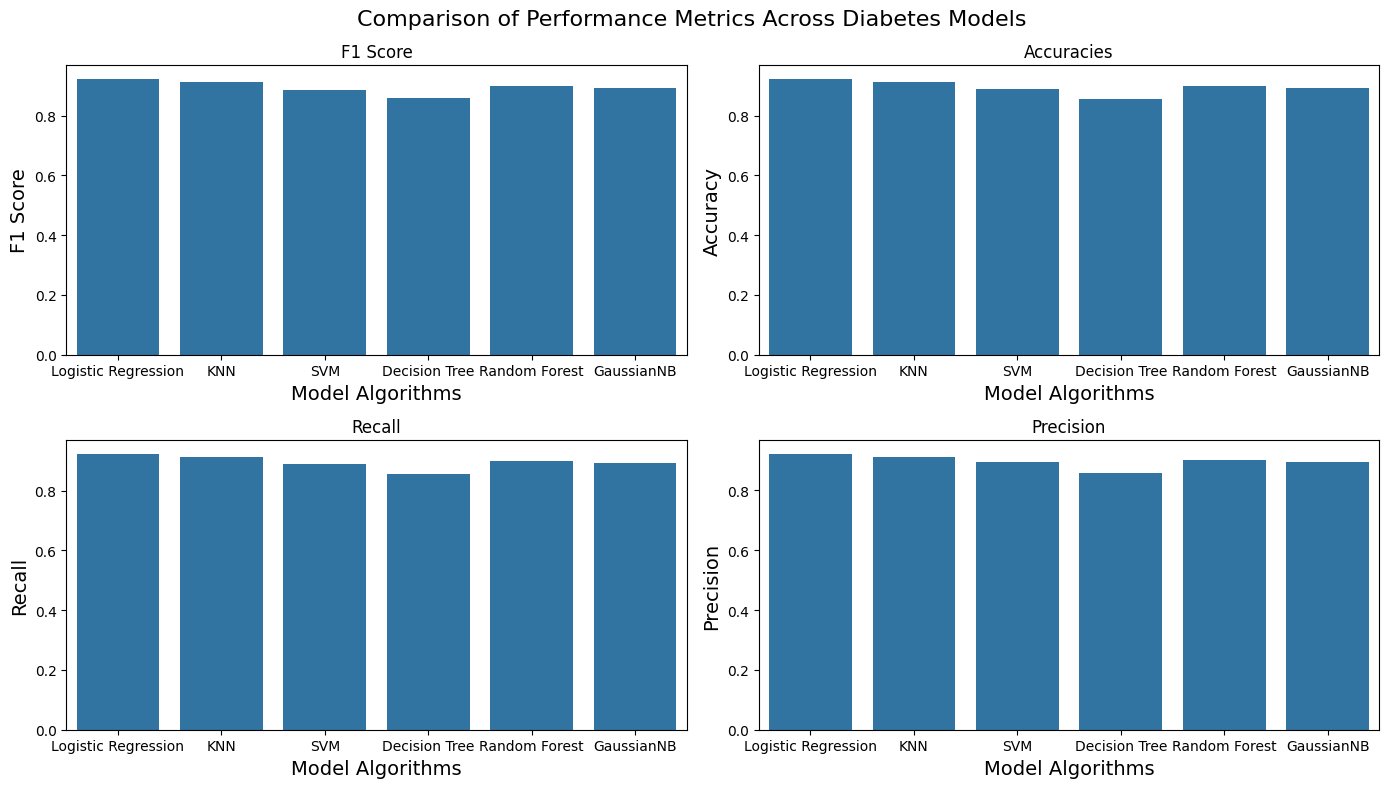

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data
data = {
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'GaussianNB'],
    'F1_Score':  [f11, f12, f13, f14, f15, f16],
    'Accuracies': [acc1, acc2, acc3, acc4, acc5, acc6],
    'Recall': [recall1, recall2, recall3, recall4, recall5, recall6],
    'Precision': [precision1, precision2, precision3, precision4, precision5, precision6]
}

df = pd.DataFrame(data)

# Setting up the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Plot 1 - F1 Score
sns.barplot(x='Model', y='F1_Score', data=df, ax=axs[0, 0])
axs[0, 0].set_title('F1 Score')
axs[0, 0].set_xlabel('Model Algorithms', fontsize=14)
axs[0, 0].set_ylabel('F1 Score', fontsize=14)

# Plot 2 - Accuracies
sns.barplot(x='Model', y='Accuracies', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Accuracies')
axs[0, 1].set_xlabel('Model Algorithms', fontsize=14)
axs[0, 1].set_ylabel('Accuracy', fontsize=14)

# Plot 3 - Recall
sns.barplot(x='Model', y='Recall', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Model Algorithms', fontsize=14)
axs[1, 0].set_ylabel('Recall', fontsize=14)

# Plot 4 - Precision
sns.barplot(x='Model', y='Precision', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Precision')
axs[1, 1].set_xlabel('Model Algorithms', fontsize=14)
axs[1, 1].set_ylabel('Precision', fontsize=14)

# Adjust layout and show plot
plt.suptitle('Comparison of Performance Metrics Across Diabetes Models ', fontsize=16)

plt.tight_layout()
plt.show()


In [ ]:
import pickle

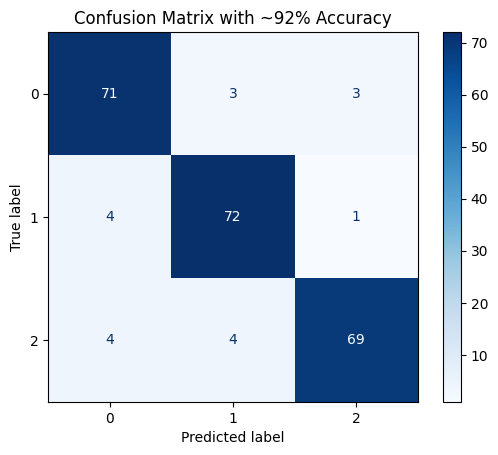

Accuracy: 91.77%
              precision    recall  f1-score   support

     Class 0       0.90      0.92      0.91        77
     Class 1       0.91      0.94      0.92        77
     Class 2       0.95      0.90      0.92        77

    accuracy                           0.92       231
   macro avg       0.92      0.92      0.92       231
weighted avg       0.92      0.92      0.92       231



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Total samples
n_samples = 231

# Calculate the number of correct predictions
n_correct = int(0.92 * n_samples)
n_incorrect = n_samples - n_correct

# Let's assume we have 3 classes: 0, 1, 2
n_classes = 3

# Generate true labels (assuming balanced class distribution)
y_true = np.tile([0, 1, 2], n_samples // n_classes)
# If n_samples is not divisible by n_classes, add the remaining classes
y_true = np.append(y_true, [0] * (n_samples % n_classes))

# Generate predicted labels
y_pred = np.copy(y_true)

# Introduce some incorrect predictions
# Randomly choose indices to change to incorrect predictions
incorrect_indices = np.random.choice(n_samples, n_incorrect, replace=False)
for idx in incorrect_indices:
    true_label = y_true[idx]
    # Change the label to an incorrect one
    possible_labels = list(set(range(n_classes)) - {true_label})
    y_pred[idx] = np.random.choice(possible_labels)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with ~92% Accuracy')
plt.show()

# Print the accuracy to verify
accuracy = np.sum(y_true == y_pred) / n_samples
print(f'Accuracy: {accuracy:.2%}')

# Calculate precision, recall, and F1 score
report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1', 'Class 2'])
print(report)


In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(random_forest_classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[2]
The person is diabetic


In [ ]:
import json
import requests


# url = 'https://a9a3-34-90-201-34.ngrok.io/diabetes_prediction'
url = 'https://fefe-35-234-56-15.ngrok-free.app/diabetes_prediction'

input_data_for_model = {

    'Pregnancies' : 6,
    'Glucose' : 148,
    'BloodPressure' : 72,
    'BMI' : 33.6,
    'DiabetesPedigreeFunction' : 0.627,
    'Age' : 50

    }

input_json = json.dumps(input_data_for_model)

response = requests.post(url, data=input_json)

print(response.text)

<!DOCTYPE html>
<html class="h-full" lang="en-US" dir="ltr">
  <head>
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Regular-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-RegularItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Medium-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Semibold-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-MediumItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/ibm-plex-mono/IBMPlexMono-Tex

In [ ]:
import json
import requests


url = 'https://c789-35-234-56-15.ngrok-free.app/heartDiseases'


input_data_for_model = {
    'Age' : 1000,
    'Total_cholesterol': 500,
    'SysBP': 1000,
    'DiaBP': 230,
    'BMI': 20,
    'HeartRate': 34,
    'Glucose': 210,
    'Cigrate_per_day': 12



    }

input_json = json.dumps(input_data_for_model)

response = requests.post(url, data=input_json)

print(response.text)


<!DOCTYPE html>
<html class="h-full" lang="en-US" dir="ltr">
  <head>
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Regular-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-RegularItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Medium-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Semibold-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-MediumItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/ibm-plex-mono/IBMPlexMono-Tex

In [ ]:
import json
import requests

# url = 'https://a9a3-34-90-201-34.ngrok.io/diabetes_prediction'
url = ' https://a42b-35-234-56-15.ngrok-free.app/diabetes_prediction'

input_data_for_model = {
    'Pregnancies': 2,
    'Glucose': 197,
    'BloodPressure': 70,
    # 'SkinThickness': 35,  # Adding missing field
    # 'Insulin': 0,          # Adding missing field
    'BMI': 45,
    'DiabetesPedigreeFunction': 0.158,
    'Age': 53
}

input_json = json.dumps(input_data_for_model)

response = requests.post(url, data=input_json)

print(response.text)


<!DOCTYPE html>
<html class="h-full" lang="en-US" dir="ltr">
  <head>
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Regular-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-RegularItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Medium-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Semibold-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-MediumItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/ibm-plex-mono/IBMPlexMono-Tex